# 手寫辨識機器學習

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam, Adam
from keras.utils import np_utils
from ipywidgets import interact_manual
(x_train, y_train), (x_test, y_test) = mnist.load_data()

C:\Users\Chun\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [3]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

## Normalization

In [4]:
x_train_1 = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test_1 = (x_test - x_test.min()) / (x_test.max()- x_test.min())

## Model1 : 

In [5]:
model1 = Sequential()
model1.add(Dense(4, input_dim=784))
model1.add(Activation('sigmoid'))
model1.add(Dense(2))
model1.add(Activation('elu'))
model1.add(Dense(10))
model1.add(Activation('softmax'))
model1.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
model1.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
__

In [6]:
model_1 = model1.fit(x_train_1, y_train, batch_size=100, epochs=20, verbose=1, validation_data=(x_test_1, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.1851 - acc: 0.9293 - val_loss: 0.1338 - val_acc: 0.9478
Epoch 2/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.1243 - acc: 0.9549 - val_loss: 0.1171 - val_acc: 0.9582
Epoch 3/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.1153 - acc: 0.9582 - val_loss: 0.1127 - val_acc: 0.9586
Epoch 4/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.1124 - acc: 0.9593 - val_loss: 0.1113 - val_acc: 0.9598
Epoch 5/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.1106 - acc: 0.9599 - val_loss: 0.1104 - val_acc: 0.9603
Epoch 6/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1099 - acc: 0.9603 - val_loss: 0.1108 - val_acc: 0.9601
Epoch 7/20
60000/60000 [==============================] - 1s 20us/step - loss: 0

## Model2 : 

In [7]:
model2 = Sequential()
model2.add(Dense(4, input_dim=784))
model2.add(Activation('relu'))
model2.add(Dense(2))
model2.add(Activation('relu'))
model2.add(Dense(10))
model2.add(Activation('softmax'))
model2.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 3140      
_________________________________________________________________
activation_4 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 10        
_________________________________________________________________
activation_5 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 3,180
Trainable params: 3,180
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_2 = model2.fit(x_train_1, y_train, batch_size=100, epochs=20, verbose=1, validation_data=(x_test_1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.1980 - acc: 0.9256 - val_loss: 0.1517 - val_acc: 0.9453
Epoch 2/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.1433 - acc: 0.9508 - val_loss: 0.1433 - val_acc: 0.9523
Epoch 3/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1325 - acc: 0.9559 - val_loss: 0.1327 - val_acc: 0.9544
Epoch 4/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1266 - acc: 0.9552 - val_loss: 0.1254 - val_acc: 0.9559
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1216 - acc: 0.9568 - val_loss: 0.1238 - val_acc: 0.9574
Epoch 6/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.1189 - acc: 0.9593 - val_loss: 0.1207 - val_acc: 0.9591
Epoch 7/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.1173 - acc: 0.9604 - val_loss: 0.1182 - val_acc

In [15]:
predict1 = model1.predict_classes(x_test_1)
predict2 = model2.predict_classes(x_test_1)

In [16]:
def test1(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print("神經網路判斷為:",predict1[測試編號])
def test2(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print("神經網路判斷為:",predict2[測試編號])

In [17]:
interact_manual(test1, 測試編號=(0, 9999));
interact_manual(test2, 測試編號=(0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

In [18]:
score1 = model1.evaluate(x_test_1, y_test)
print('model1:')
print('loss:', score1[0])
print('正確率:', score1[1])
score2 = model2.evaluate(x_test_1, y_test)
print('model2:')
print('loss:', score2[0])
print('正確率:', score2[1])

10000/10000 [==============================] - 0s 24us/step
model1:
loss: 0.11222401076555252
正確率: 0.9604600059509277
10000/10000 [==============================] - 0s 22us/step
model2:
loss: 0.11806415605545044
正確率: 0.9621999979019165


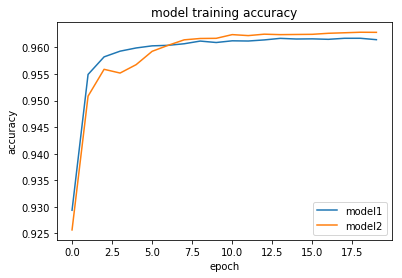

In [19]:
plt.plot(model_1.history["acc"])
plt.plot(model_2.history["acc"])

plt.title("model training accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["model1", "model2"], loc="best")
plt.show()

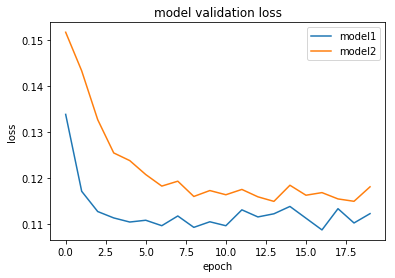

In [20]:
plt.plot(model_1.history["val_loss"])
plt.plot(model_2.history["val_loss"])

plt.title("model validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["model1", "model2"], loc="best")
plt.show()